# Figure 4. Timeseries of Microbial biomass and fluxes of desorption/adsorption

Fig. 4. The changes of total SOC remaining during long-term bare fallow simulated by MIMICSa and MIMICSb (panel a). The observations are labeled as points. The unit of measure for root mean square error (RMSE) is g C kg-1 soil. Simulated temporal dynamics of carbon pools (panel b) and fractions of carbon pools in total SOC at the initial vs. final bare fallow stages (panel c) during the long-term bare fallow experiments at field condition for five selected sites.
Figure note: MBr, MBK, CAvl, CPhs, and CChm are r-type microbial biomass, K-type microbial biomass, available carbon, physically-protected carbon, and chemically-recalcitrant carbon, respectively.


In [1]:
library(reshape2)
library(ggplot2)
library(data.table)

Warning message:
"package 'reshape2' was built under R version 4.0.5"
Warning message:
"package 'data.table' was built under R version 4.0.5"

Attaching package: 'data.table'


The following objects are masked from 'package:reshape2':

    dcast, melt




## Data prepare

In [2]:
# data prepare
# load SOC predicted by MIMICS 
model_name = 'MIMICSa'
bf_mimics0 = read.csv(file= paste0('../output/prediction_BF_',model_name,'.csv'))
model_name = 'MIMICSb'
bf_mimics1 = read.csv(file= paste0('../output/prediction_BF_',model_name,'.csv'))
model_name = 'MIMICSc'
bf_mimics2 = read.csv(file= paste0('../output/prediction_BF_',model_name,'.csv'))

In [3]:
b_mi0 = subset(bf_mimics0, select=c('site', 'years', 'MIC_1', 'MIC_2', 'SOM_1', 'SOM_2', 'SOM_3', 'bulkD' ))
b_mi0$model_type = 'MIMICSa'

b_mi1 = subset(bf_mimics1, select=c('site', 'years', 'MIC_1', 'MIC_2', 'SOM_1', 'SOM_2', 'SOM_3', 'bulkD' ))
b_mi1$model_type = 'MIMICSb'

b_mi2 = subset(bf_mimics2, select=c('site', 'years', 'MIC_1', 'MIC_2', 'SOM_1', 'SOM_2', 'SOM_3', 'bulkD' ))
b_mi2$model_type = 'MIMICSc'

bfdata = rbind(b_mi0, b_mi1, b_mi2)

In [4]:
# Convert the unit of carbon by dividing bulk Density
# unit of individual C pools in input data are mg C per cm3
bfdata$MBr = bfdata$MIC_1/bfdata$bulkD
bfdata$MBK = bfdata$MIC_2/bfdata$bulkD
bfdata$Cphs = bfdata$SOM_1/bfdata$bulkD
bfdata$Cchm = bfdata$SOM_2/bfdata$bulkD
bfdata$Cavl = bfdata$SOM_3/bfdata$bulkD

In [5]:
# combine data
bfdata = subset(bfdata, select = c('site', 'years', 
                                   'MBr', 'MBK', 
                                   'Cavl', 'Cchm', 'Cphs',  'model_type'))
bfdata = bfdata[bfdata$years<=100, ]
# data prepare done

## plot timeseries of Cavl


In [6]:

theme_set(
  theme_bw() +
  theme(#panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        legend.position = "bottom",
        legend.text = element_text(size = 13), 
        legend.title = element_blank(),
        strip.text = element_text(size = 13, face = "bold"), 
        axis.text.x = element_text(size = 13, angle = 45, hjust=1),
        axis.text.y = element_text(size = 13),
        axis.title=element_text(size=13))
       )         

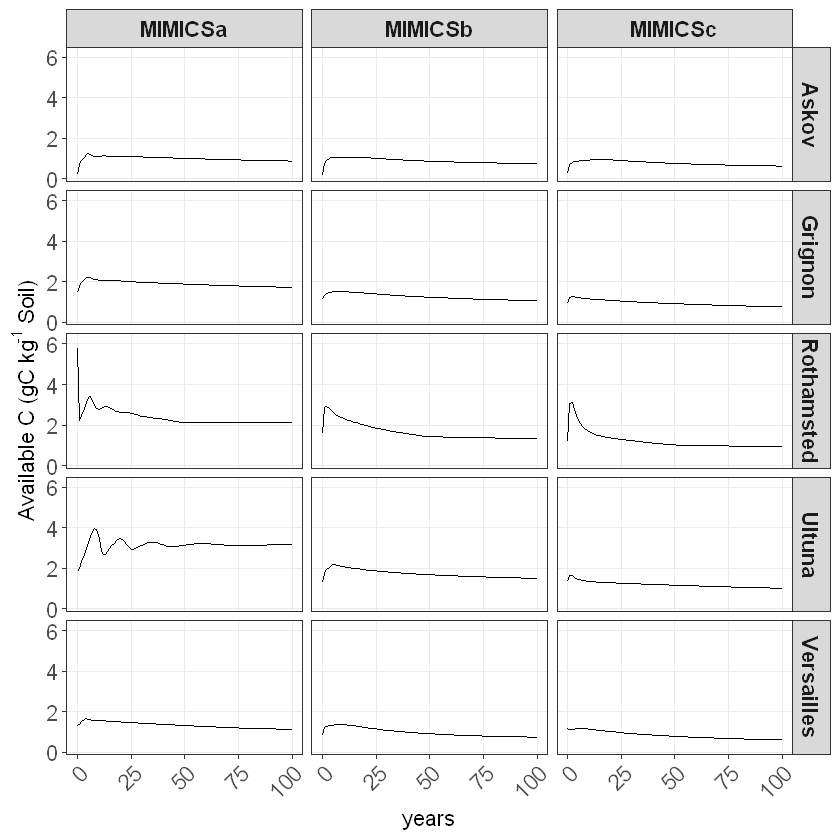

In [7]:
# area plot of carbon component
 ggplot(data=bfdata)+
             geom_line(aes(x=years, y= Cavl)) +
             facet_grid(site ~ model_type) +
             ylab(expression(paste('Available C (gC kg'^'-1',' Soil)')))  +
             expand_limits(y=c(NA, 6.2))

In [10]:
ggsave("output/Fig.S5_Avail_C.jpg", width = 6, height = 8,  dpi=600)

In [8]:
pre.pool <- melt(bfdata,id=c('site', 'years','model_type'))
colnames(pre.pool)= c('site',  'years', 'model_type', 'Pool', 'pool_size')
# head(pre.pool)
unique(pre.pool$Pool)

Warning message in melt(bfdata, id = c("site", "years", "model_type")):
"The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(bfdata). In the next version, this warning will become an error."


[1] MBr  MBK  Cavl Cchm Cphs
Levels: MBr MBK Cavl Cchm Cphs

# Panel b:  Area plot of microbial pool

In [9]:
col_pools = c( 'blue','red', # MBr MBK
               '#fe0000', '#e5ab01',   '#808080' )    #  Cavail,  Cchem,  Cphys 

legend_labs = c(
                expression(~italic(MB)[r]), 
                expression(~italic(MB)[K]),    
                expression(~italic(C)[Avl]),
                expression(~italic(C)[Chm]),    
                expression(~italic(C)[Phs]))

In [10]:
pre.pool$Pool = factor(pre.pool$Pool, level = c(
                                            'MBr', 'MBK', 'Cavl',  'Cchm', 'Cphs'))
pre.pool = pre.pool[pre.pool$years<=100, ]

### Plot timeseries of Microbial biomasses

In [11]:
# area plot of carbon component
p_MicBiom  <- ggplot(pre.pool[pre.pool$Pool == 'MBr' | pre.pool$Pool == 'MBK',],
                    aes(x=years, y= pool_size))+
             geom_area(aes(fill= Pool)) +
             facet_grid(site ~ model_type) + 
             ylab(expression(paste('Concentration of carbon pools (gC kg'^'-1',' Soil)'))) +
             xlab('Time under bare fallow (years)') +
             scale_fill_manual(values=col_pools[1:2],
                               labels= legend_labs[1:2]) 

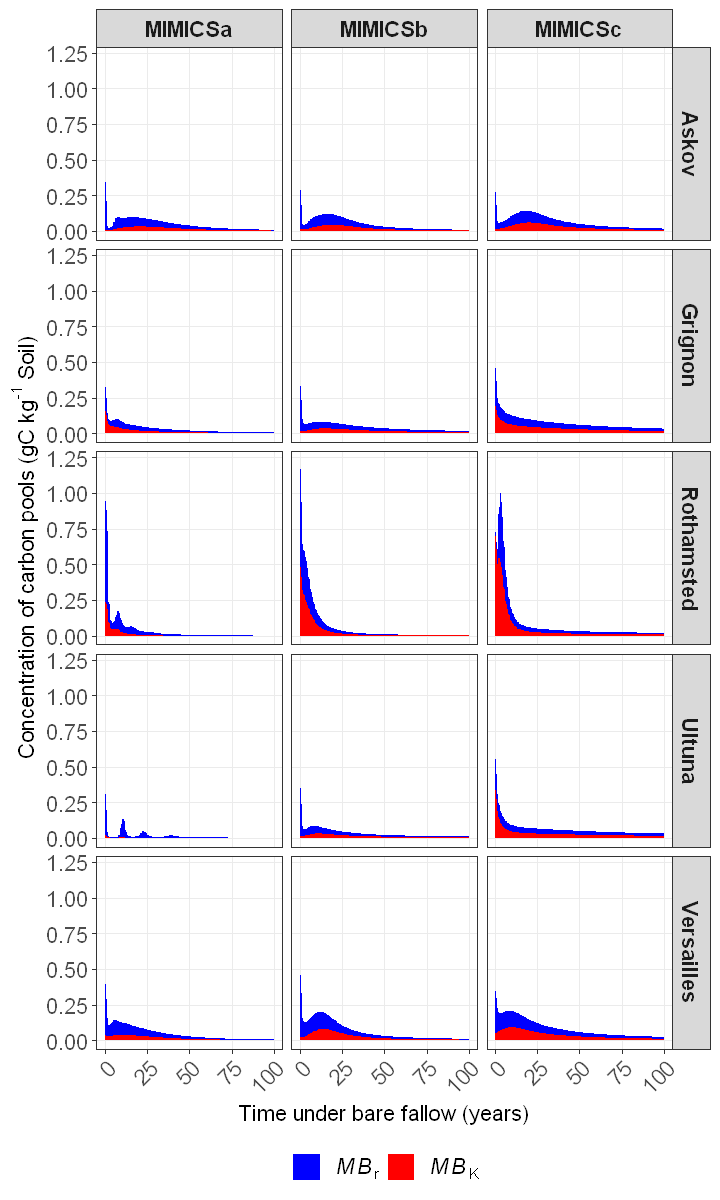

In [49]:
p_MicBiom
ggsave("Fig.4-b.eps", width = 6, height = 8,  dpi=600)

# Panel a: Plot the desorption and asorption fluxes

In [12]:
# site info (temperature etc)
siteinfo <- read.csv('../dinput/site5info.csv')

### MIMICSa

The mineral desorption fluxes (i.e. the flux from C_phs to C_avl) in MIMICS0 and MIMICS1 are described as:
F_des = k_des*C_phs                                                                                       

In MIMICSa, Cphs is formed by direct adsorption of a proportion of microbial residues:
F_ads=f_[r]^phs  × T_(MB[r]) + f_[K]^phs × T_(MB[K])

In [13]:
# desorption flux function for MIMICS0
# Unit of output F_des is gC per kg Soil per year
F_des = function(t,
                 timestep=24*365, #yearly
                 bulkD,           #  g per cm3
                 CLAY = 17,
                 LIG  = 18.73,
                 CN   = 74.27,
                 Cphs             # unit gC per cm3
                 )
    { fCLAY     = CLAY/100                   # clay content, convert from clay fraction to %
      # desorb
      desorb    = 1.5e-5 * exp(-1.5*(fCLAY))    # unit per hour  #CHANGED FOR GLOBAL RUN!!!  
      Fdes      = desorb* timestep * Cphs       # unit gC per cm3 Soil per year
      Fdes      = Fdes/bulkD}                   # gC per kg Soil per year

In [14]:
# Adsorption flux function for MIMICS0 
F_ads = function(
                 timestep,
                 bulkD,
                 CLAY = 17,
                 LIG  = 18.73,
                 CN   = 74.27,
                 beta,
                 MBr,
                 MBK
                 )
    { fCLAY     = CLAY/100                   # clay content, convert from clay fraction to %
      calCN     = (1 / CN) / 2.5 * 100 
      fMET      = 0.85 - 0.013 * LIG /calCN            #as calculated in DAYCENT   
      fPHYS     = c(0.3 * exp(1.3*fCLAY), 0.2 * exp(0.8*fCLAY))   #fraction to SOMp
      Tao_MOD   = 1
      tao       = c(5.2e-4*exp(0.3*fMET), 2.4e-4*exp(0.1*fMET))* Tao_MOD * timestep  # microbial biomass turover rates of r and K types 
      
      Fads      = MBr^beta * tao[1] * fPHYS[1] +  MBK^beta * tao[2] * fPHYS[2]
      Fads      = Fads/bulkD}

In [15]:
## Load data
bfdata = bf_mimics0
# load model
model_name = 'MIMICSa'
source(paste0('../code.proc/',model_name,'.R'))

In [16]:
# load optimized parameters
parm_opt = read.csv(file = paste0('../output/parameter_opt_', model_name,'.csv'))

### Calculate Desorption fluxes

In [17]:
nsite = c('Askov',  'Grignon', 'Rothamsted', 'Ultuna', 'Versailles')

bfdata$Fdes = NA

for (i in unique(nsite))
{ tmp = bfdata[bfdata$site == i, ]
  # assign site-specific soil temperature and clay fraction 
  TSOI = siteinfo[siteinfo$site==i, 'mat']
  CLAY = siteinfo[siteinfo$site==i, ]$CLAY   
  ibulkD = max(siteinfo[siteinfo$site==i, 'bulkden_ini'],
                siteinfo[siteinfo$site==i, 'bulkden_fin'] )
  bfdata[bfdata$site == i, 'Fdes'] = F_des(t = tmp$years,
                 timestep=24*365, #yearly
                 bulkD = ibulkD,
                 CLAY = CLAY,
                 LIG  = 18.73,
                 CN   = 74.27,
                 Cphs = bfdata[bfdata$site == i, 'SOM_1']
                 )
 }

In [18]:
summary(bfdata$Fdes)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0001223 0.0042519 0.0152877 0.0476838 0.0666231 0.3948831 

### Calculate Adsorption fluxes

In [19]:
bfdata$Fads = NA

for (i in unique(nsite))
{ tmp = bfdata[bfdata$site == i, ]
  # assign site-specific soil temperature and clay fraction 
  TSOI = siteinfo[siteinfo$site==i, 'mat']
  CLAY = siteinfo[siteinfo$site==i, ]$CLAY     
  beta  = parm_opt[parm_opt$site==i, 'beta']
  ibulkD = max(siteinfo[siteinfo$site==i, 'bulkden_ini'],
                siteinfo[siteinfo$site==i, 'bulkden_fin'] )  
  bfdata[bfdata$site == i, 'Fads'] = F_ads(
                 timestep = 24 * 365,
                 bulkD = ibulkD,
                 CLAY = CLAY,
                 LIG  = 18.73,
                 CN   = 74.27,
                 beta = 1.1, #beta,
                 MBr  = bfdata[bfdata$site == i, 'MIC_1'],
                 MBK  = bfdata[bfdata$site == i, 'MIC_2'])
 }

In [20]:
# Get ads and desorption fluxes for MIMICS0
pdata1 = subset(bfdata, select = c(site, years, Fdes, Fads))
pdata1 = melt(pdata1, id = c('site', 'years'))
colnames(pdata1) = c('site', 'years', 'Flux', 'value')
pdata1$model_type = 'MIMICSa'
# head(pdata1)

Warning message in melt(pdata1, id = c("site", "years")):
"The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(pdata1). In the next version, this warning will become an error."


### MIMICSb

In MIMICS1, Cphs is formed by direct adsorption of available carbon (F_(avl→phs)) rather than by direct adsorption of microbial residues:
F_ads = k_ads × C_avl × (1-C_phs/Q_max )                                                                 

In [21]:
# desorption flux function for MIMICS1
F_des = function(t,
                 timestep=24, #daily
                 bulkD,
                 CLAY,
                 LIG  = 18.73,
                 CN   = 74.27,
                 Cphs
                 )
    { fCLAY     = CLAY/100                   # clay content, convert from clay fraction to %
      # desorb
      desorb    = 1.5e-5 * exp(-1.5*(fCLAY))    # hourly  #CHANGED FOR GLOBAL RUN!!!  
      Fdes      = desorb* timestep * Cphs 
      Fdes      = Fdes/bulkD}

In [22]:
# Adsorption flux function for MIMICS1
F_ads = function(
                 timestep,
                 bulkD,
                 CLAY,
                 Cavl,
                 Cphs
                 )
    { fCLAY     = CLAY/100                      # clay content, convert from clay fraction to %
      desorb    = 1.5e-5 * exp(-1.5*(fCLAY))    # hourly  #CHANGED FOR GLOBAL RUN!!!  
      kads      = 6 * desorb * timestep
      Qmax      = bulkD * 10^(0.297 * log10(CLAY) + 3.335 )/1000    
      Fads      = kads * Cavl * (1- Cphs/Qmax ) 
      Fads      = Fads/ bulkD 
   }  

In [23]:
## Load data
bfdata = bf_mimics1

In [24]:
# load model
model_name = 'MIMICSb'
source(paste0('../code.proc/', model_name, '.R'))

In [25]:
# load optimized parameters
parm_opt = read.csv(file = paste0('../output/parameter_opt_', model_name,'.csv'))

### Calculate Desorption fluxes

In [26]:
bfdata$Fdes = NA

for (i in unique(nsite))
{ tmp = bfdata[bfdata$site == i, ]
  # assign site-specific soil temperature and clay fraction 
  TSOI = siteinfo[siteinfo$site==i, 'mat']
  CLAY = siteinfo[siteinfo$site==i, ]$CLAY   

  bfdata[bfdata$site == i, 'Fdes'] = F_des(t = tmp$days,
                 timestep=24 * 365, #yearly
                 bulkD = bfdata[bfdata$site == i, 'bulkD'],
                 CLAY = CLAY,
                 LIG  = 18.73,
                 CN   = 74.27,
                 Cphs = bfdata[bfdata$site == i, 'SOM_1']
                 )
 }

In [27]:
summary(bfdata$Fdes)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.2319  0.2605  0.2876  0.2893  0.3053  0.4429 

### Calculate Adsorption fluxes

In [28]:
bfdata$Fads = NA

for (i in unique(nsite))
{ tmp = bfdata[bfdata$site == i, ]
  # assign site-specific soil temperature and clay fraction 
  CLAY = siteinfo[siteinfo$site==i, ]$CLAY     

  bfdata[bfdata$site == i, 'Fads'] = F_ads(
                 timestep = 24*365,
                 bulkD = bfdata[bfdata$site == i, 'bulkD'],
                 CLAY = CLAY,
                 Cavl  = bfdata[bfdata$site == i, 'SOM_3'],
                 Cphs  = bfdata[bfdata$site == i, 'SOM_1'])
 }

In [29]:
summary(bfdata$Fads)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.03041 0.23859 0.26032 0.26136 0.28795 0.60376 

In [30]:
# Get ads and desorption fluxes for MIMICS1
pdata2 = subset(bfdata, select = c(site, years, Fdes, Fads))
pdata2 = melt(pdata2, id = c('site', 'years'))
colnames(pdata2) = c('site', 'years', 'Flux', 'value')
pdata2$model_type = 'MIMICSb'
head(pdata2)

Warning message in melt(pdata2, id = c("site", "years")):
"The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(pdata2). In the next version, this warning will become an error."


,site,years,Flux,value,model_type
,<chr>,<int>,<fct>,<dbl>,<chr>
1,Askov,0,Fdes,0.3468631,MIMICSb
2,Askov,1,Fdes,0.3193748,MIMICSb
3,Askov,2,Fdes,0.3034246,MIMICSb
4,Askov,3,Fdes,0.2941484,MIMICSb
5,Askov,4,Fdes,0.2887217,MIMICSb
6,Askov,5,Fdes,0.2853509,MIMICSb


### MIMICSc

In MIMICS1, Cphs is formed by direct adsorption of available carbon (F_(avl→phs)) rather than by direct adsorption of microbial residues:
F_ads = k_ads × C_avl × (1-C_phs/Q_max )                                                                 

In [31]:
# desorption flux function for MIMICS1
F_des = function(t,
                 timestep=24, #daily
                 bulkD,
                 CLAY,
                 LIG  = 18.73,
                 CN   = 74.27,
                 Cphs
                 )
    { fCLAY     = CLAY/100                   # clay content, convert from clay fraction to %
      # desorb
      desorb    = 1.5e-5 * exp(-1.5*(fCLAY))    # hourly  #CHANGED FOR GLOBAL RUN!!!  
      Fdes      = desorb* timestep * Cphs 
      Fdes      = Fdes/bulkD}

In [32]:
# Adsorption flux function for MIMICS1
F_ads = function(
                 timestep,
                 bulkD,
                 CLAY,
                 SILT,
                 Cavl,
                 Cphs
                 )
    { fCLAY     = CLAY/100                      # clay content, convert from clay fraction to %
      desorb    = 1.5e-5 * exp(-1.5*(fCLAY))    # hourly  #CHANGED FOR GLOBAL RUN!!!  
      kads      = 6 * desorb * timestep
      Qmax      = bulkD * 0.86*(CLAY + SILT)    
      Fads      = kads * Cavl * (1- Cphs/Qmax ) 
      Fads      = Fads/ bulkD 
   }  

In [33]:
## Load data
bfdata = bf_mimics2

In [35]:
# load model
model_name = 'MIMICSc'
source(paste0('../code.proc/', model_name, '.R'))

In [36]:
# load optimized parameters
parm_opt = read.csv(file = paste0('../output/parameter_opt_', model_name,'.csv'))

### Calculate Desorption fluxes

In [37]:
bfdata$Fdes = NA

for (i in unique(nsite))
{ tmp = bfdata[bfdata$site == i, ]
  # assign site-specific soil temperature and clay fraction 
  TSOI = siteinfo[siteinfo$site==i, 'mat']
  CLAY = siteinfo[siteinfo$site==i, ]$CLAY   
 
  bfdata[bfdata$site == i, 'Fdes'] = F_des(t = tmp$days,
                 timestep=24 * 365, #yearly
                 bulkD = bfdata[bfdata$site == i, 'bulkD'],
                 CLAY = CLAY,
                 
                 LIG  = 18.73,
                 CN   = 74.27,
                 Cphs = bfdata[bfdata$site == i, 'SOM_1']
                 )
 }

In [38]:
summary(bfdata$Fdes)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.2619  0.3821  0.4504  0.4518  0.5024  0.7287 

### Calculate Adsorption fluxes

In [39]:
bfdata$Fads = NA

for (i in unique(nsite))
{ tmp = bfdata[bfdata$site == i, ]
  # assign site-specific soil temperature and clay fraction 
  CLAY = siteinfo[siteinfo$site==i, ]$CLAY     
  SILT = siteinfo[siteinfo$site==i, ]$SILT
  bfdata[bfdata$site == i, 'Fads'] = F_ads(
                 timestep = 24*365,
                 bulkD = bfdata[bfdata$site == i, 'bulkD'],
                 CLAY = CLAY,
                 SILT = SILT,
                 Cavl  = bfdata[bfdata$site == i, 'SOM_3'],
                 Cphs  = bfdata[bfdata$site == i, 'SOM_1'])
 }

In [40]:
summary(bfdata$Fads)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1424  0.3701  0.4360  0.4481  0.4893  1.5819 

In [41]:
# Get ads and desorption fluxes for MIMICS1
pdata3 = subset(bfdata, select = c(site, years, Fdes, Fads))
pdata3 = melt(pdata3, id = c('site', 'years'))
colnames(pdata3) = c('site', 'years', 'Flux', 'value')
pdata3$model_type = 'MIMICSc'
head(pdata3)

Warning message in melt(pdata3, id = c("site", "years")):
"The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(pdata3). In the next version, this warning will become an error."


,site,years,Flux,value,model_type
,<chr>,<int>,<fct>,<dbl>,<chr>
1,Askov,0,Fdes,0.4779427,MIMICSc
2,Askov,1,Fdes,0.4591551,MIMICSc
3,Askov,2,Fdes,0.4535746,MIMICSc
4,Askov,3,Fdes,0.4520820,MIMICSc
5,Askov,4,Fdes,0.4524321,MIMICSc
6,Askov,5,Fdes,0.4537508,MIMICSc


In [42]:
# combine the three models
pdata = rbind(pdata1, pdata2, pdata3)
# pdata = pdata[pdata$years <= 100, ]

In [43]:
theme_set(
  theme_bw() +
  theme(#panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        legend.position = "bottom",
        legend.text = element_text(size = 13), 
        legend.title = element_blank(),
        strip.text = element_text(size = 13, face = "bold"), 
        axis.text.x = element_text(size = 13, angle = 45, hjust=1),
        axis.text.y = element_text(size = 13),
        axis.title=element_text(size=13))
       )         

In [44]:
# predicted vs observed time-series plot
desp_adsp_curve <- ggplot(aes(x =years , y = value, color=Flux), data = pdata)+ 
  facet_grid(site ~ model_type) +
  geom_line() +
  scale_color_manual(values = c('red', 'blue'),
                    labels  = c('Desorption Flux', 'Adsorption Flux')) +
  # theme(legend.direction = "vertical") +
  xlab('Time under bare fallow (years)') +
  ylab(expression(paste('Adsorption or Desorption Flux (gC kg'^'-1',' soil year'^'-1',')')))

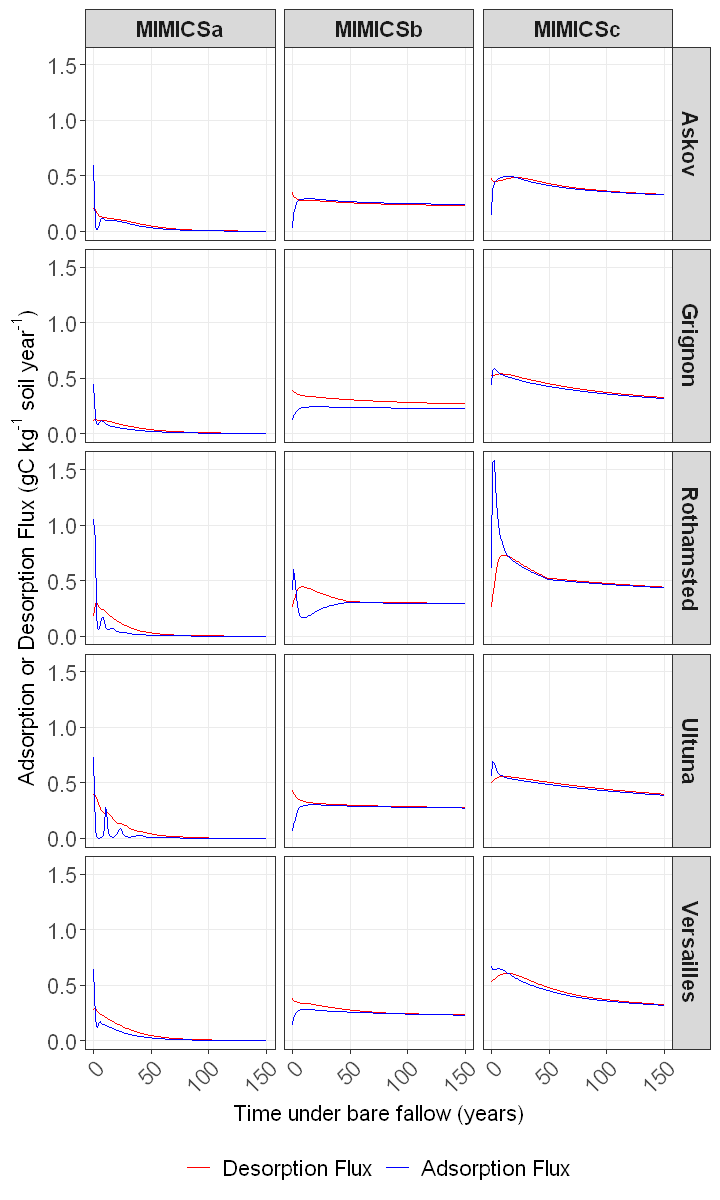

In [45]:
options(repr.plot.width = 6, repr.plot.height = 10)
desp_adsp_curve

In [46]:
ggsave("Fig.4-a.eps", width = 6, height = 8,  dpi=600)

In [47]:
library(ggpubr)
p_desp_mic = ggarrange(desp_adsp_curve, p_MicBiom,
                    labels = c("(a)", "(b)"),
                    #common.legend = TRUE,
                    ncol = 2, nrow = 1,
                    widths = c(1, 1))

Warning message:
"package 'ggpubr' was built under R version 4.0.5"


In [48]:
ggsave("Fig.4.eps", width = 12, height = 8,  dpi=600)

Depending on the site, the net of both fluxes approaches zero after X-Y years for MIMICSa and X-Y years MIMICSb. 

In [38]:
eqdata = cbind(pdata[pdata$Flux == 'Fads',  c('site', 'model_type', 'years',  'value')], pdata[pdata$Flux == 'Fdes',   'value'])
colnames(eqdata) = c('site', 'model', 'years','Fads', 'Fdes')   
eqdata$dif = eqdata$Fdes - eqdata$Fads 

In [39]:
head(eqdata)

,site,model,years,Fads,Fdes,dif
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
756,Askov,MIMICSa,0,0.59450374,0.2052556,-0.38924814
757,Askov,MIMICSa,1,0.04878521,0.2018492,0.15306401
758,Askov,MIMICSa,2,0.02160000,0.1828185,0.16121848
759,Askov,MIMICSa,3,0.02197303,0.1648173,0.14284427
760,Askov,MIMICSa,4,0.03527569,0.1496081,0.11433243
761,Askov,MIMICSa,5,0.06517803,0.1385541,0.07337604


In [40]:
summary(eqdata)

     site              model               years          Fads          
 Length:1510        Length:1510        Min.   :  0   Min.   :0.0000173  
 Class :character   Class :character   1st Qu.: 37   1st Qu.:0.0067579  
 Mode  :character   Mode  :character   Median : 75   Median :0.1694601  
                                       Mean   : 75   Mean   :0.1450087  
                                       3rd Qu.:113   3rd Qu.:0.2616135  
                                       Max.   :150   Max.   :1.0496808  
      Fdes                dif           
 Min.   :0.0001223   Min.   :-0.877523  
 1st Qu.:0.0152884   1st Qu.: 0.002030  
 Median :0.2346311   Median : 0.006165  
 Mean   :0.1685001   Mean   : 0.023491  
 3rd Qu.:0.2887208   3rd Qu.: 0.034195  
 Max.   :0.4429054   Max.   : 0.366862  

In [41]:
summary(eqdata[eqdata$dif > 0,])

     site              model               years             Fads          
 Length:1353        Length:1353        Min.   :  0.00   Min.   :0.0000173  
 Class :character   Class :character   1st Qu.: 38.00   1st Qu.:0.0054884  
 Mode  :character   Mode  :character   Median : 75.00   Median :0.0756208  
                                       Mean   : 75.32   Mean   :0.1289568  
                                       3rd Qu.:113.00   3rd Qu.:0.2509983  
                                       Max.   :150.00   Max.   :0.3547450  
      Fdes                dif          
 Min.   :0.0001223   Min.   :0.000105  
 1st Qu.:0.0114079   1st Qu.:0.003401  
 Median :0.1327647   Median :0.008339  
 Mean   :0.1589114   Mean   :0.029954  
 3rd Qu.:0.2933992   3rd Qu.:0.041001  
 Max.   :0.4429054   Max.   :0.366862  

If NET Flux of Fads and Fdes (dif) is below 0.015 gC per kg Soil per year, we say it approaches zero.

In [42]:
for (m in unique(eqdata$model))
    {print(m)
     for (i in unique(eqdata$site))
        { print(i)
         eq_years = eqdata[eqdata$model == m & eqdata$site == i & eqdata$years > 20 & eqdata$dif < 0.015 & eqdata$dif > - 0.015 ,'years']
         print(min(eq_years))}
     }


[1] "MIMICSa"
[1] "Askov"
[1] 21
[1] "Grignon"
[1] 52
[1] "Rothamsted"
[1] 58
[1] "Ultuna"
[1] 63
[1] "Versailles"
[1] 60
[1] "MIMICSb"
[1] "Askov"
[1] 22
[1] "Grignon"


Warning message in min(eq_years):
"min里所有的参数都不存在; 回覆Inf"


[1] Inf
[1] "Rothamsted"
[1] 47
[1] "Ultuna"
[1] 21
[1] "Versailles"
[1] 56


 Depending on the site, the net of both fluxes approaches zero (less than 0.015 gC kg-1 Soil year-1) after 21-63 years for MIMICSa and 42-90 years MIMICSb. 

The desorption and adsorption fluxes simulated by MIMICSb (0.23–0.33 g C kg-1 soil year-1) were substantially greater than those simulated by MIMICSa (1.65×10-5–0.048 g C kg-1 soil year-1) after 50–150 years of bare fallow (Fig. 7).

In [33]:
for (m in unique(pdata$model_type))
    {print(m)
         Flux50 = pdata[pdata$model_type == m  & pdata$years > 50 ,'value']
         print(min(Flux50))
         print(max(Flux50))
     }

[1] "MIMICSa"
[1] 1.654011e-05
[1] 0.04758385
[1] "MIMICSb"
[1] 0.2269673
[1] 0.3301739


In [66]:
# combine MIMICS0 and MIMICS1
pdata.h = pdata
# unit from gC kg'^'-1',' Soil year'^'-1'
#      to   gC kg'^'-1',' Soil hour'^'-1'
pdata.h$value = pdata.h$value/24/365 

In [67]:
# predicted vs observed time-series plot
bf_scatter.h <- ggplot(aes(x =years , y = value, color=Flux), data = pdata.h)+ 
  facet_grid( model_type ~ site) +
  geom_line() +
  scale_color_manual(values = c('red', 'blue'),
                    labels  = c('Desorption Flux', 'Adsorption Flux')) +
  xlab('Time under bare fallow (years)') +
  ylab(expression(paste('Adsorption or Desorption Flux (gC kg'^'-1',' Soil hour'^'-1',')')))

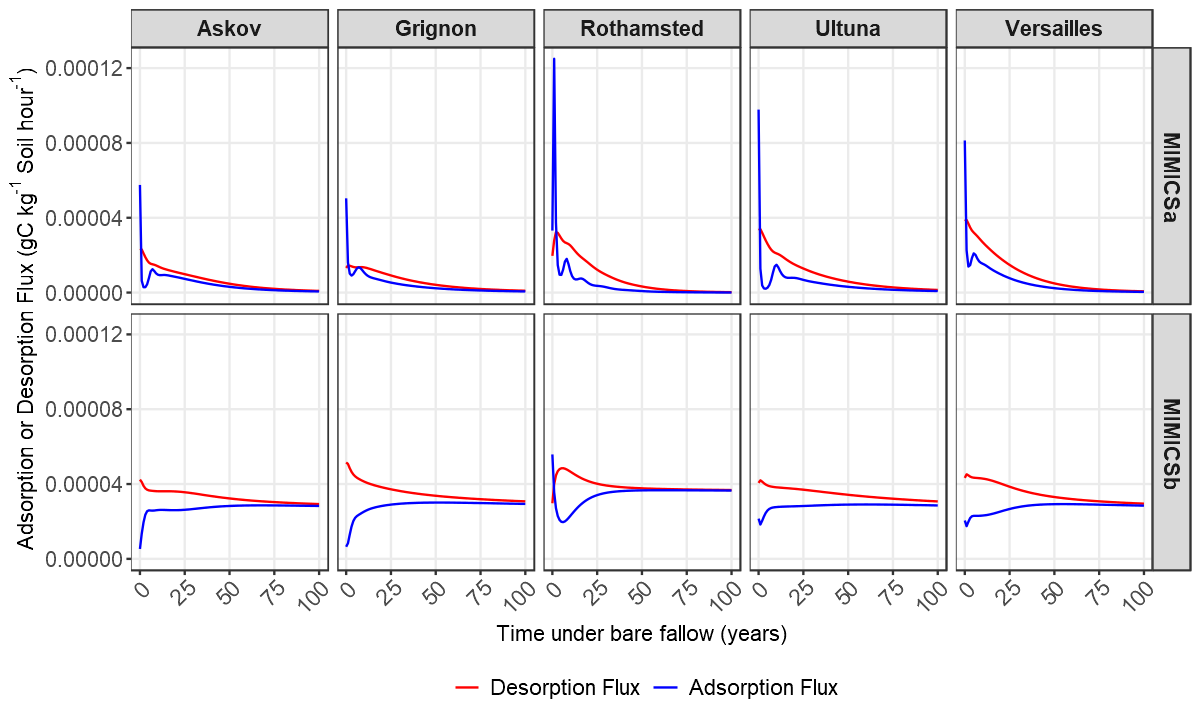

In [68]:
options(repr.plot.width = 10, repr.plot.height = 6)
bf_scatter.h

In [69]:
ggsave("Fig_Fads_Fdes_MIMICS0_MIMICS1.hourly.jpg", width = 8, height = 5,  dpi=600)